In [41]:
import sys
import numpy as np
import pandas as pd
sys.path.append('../')
from sklearn.cluster import KMeans
from dataprep.eda import create_report
from functions.clustering import perform_clustering

  0%|          | 0/3540 [00:00<?, ?it/s]

c:\Users\evapa\VS Projects\LLMs-for-explanations\.venv\lib\site-packages\dask\core.py:127: RuntimeWarning: invalid value encountered in divide
  return func(*(_execute_task(a, cache) for a in args))
c:\Users\evapa\VS Projects\LLMs-for-explanations\.venv\lib\site-packages\dataprep\eda\distribution\render.py:274: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame({col: [nrows - npresent]}, index=["Others"]))


DataPrep Report
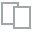
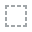
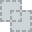
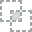
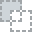
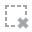
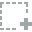
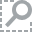
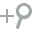
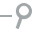
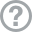
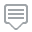
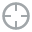
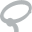
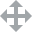
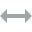
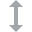
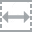
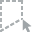
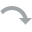
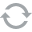
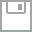
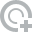
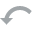
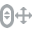
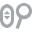
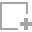
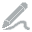
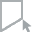
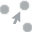
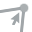
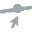

In [42]:
# read data
data = pd.read_pickle('../data/clustering_input/clustering_df_categories.pkl')
create_report(data)

In [43]:
# convert step_goal to float
data['step_goal'] = data['step_goal'].astype(float)

In [44]:
columns = list(data.columns)
columns.remove('id')
columns.remove('date')

outlier_indices = set()
for user_id, user_data in data.groupby('id'):
    for col in columns:
        Q1 = user_data[col].quantile(0.25)
        Q3 = user_data[col].quantile(0.75)
        IQR = Q3 - Q1
        
        lower_bound = Q1 - 3 * IQR
        upper_bound = Q3 + 3 * IQR
        
        outliers = user_data[(user_data[col] < lower_bound) | (user_data[col] > upper_bound)].index
        # print(f'User {user_id} from the {len(user_data)} has {len(outliers)} outliers in column {col}')
        outlier_indices.update(outliers)
data_cleaned = data.drop(index=outlier_indices)

In [45]:
data_cleaned.to_pickle('../data/clustering_input/clustering_df_categories_no_outliers_3.pkl')

In [46]:
# prepare data for clustering (store and then remove id)
user_id = data_cleaned['id']
dates = data_cleaned['date']
data_cleaned.drop(columns=['id', 'date'], inplace=True)
data_cleaned

exertion_points  step_goal  minutes_below_zone_1  minutes_in_zone_1  \
0              0.622928        0.0              0.936806           0.081134   
1              0.622928        0.0              0.936806           0.081134   
2              0.622928        0.0              0.936806           0.081134   
3              0.622928        0.0              0.936806           0.081134   
4              0.622928        0.0              0.936806           0.081134   
...                 ...        ...                   ...                ...   
159525         0.720932        0.0              0.568056           0.302053   
159526         0.720932        0.0              0.568056           0.302053   
159527         0.720932        0.0              0.568056           0.302053   
159528         0.720932        0.0              0.568056           0.302053   
159529         0.720932        0.0              0.568056           0.302053   

           steps  very_active_minutes  minutes_in_zone_2  minutes_in_zone_3  \
0       0.017563             0.080685           0.000000                0.0   
1       0.000000             0.080685           0.000000                0.0   
2       0.046184             0.080685           0.000000                0.0   
3       0.002661             0.080685           0.000000                0.0   
4       0.000000             0.080685           0.000000                0.0   
...          ...                  ...                ...                ...   
159525  0.008160             0.056235           0.003195                0.0   
159526  0.057123             0.056235           0.003195                0.0   
159527  0.122760             0.056235           0.003195                0.0   
159528  0.059429             0.056235           0.003195                0.0   
159529  0.214121             0.056235           0.003195                0.0   

        altitude  lightly_active_minutes  moderately_active_minutes  \
0            0.0                0.254701                   0.083045   
1            0.0                0.254701                   0.083045   
2            0.0                0.254701                   0.083045   
3            0.0                0.254701                   0.083045   
4            0.0                0.254701                   0.083045   
...          ...                     ...                        ...   
159525       0.1                0.545299                   0.221453   
159526       0.1                0.545299                   0.221453   
159527       0.1                0.545299                   0.221453   
159528       0.1                0.545299                   0.221453   
159529       0.1                0.545299                   0.221453   

        sedentary_minutes  exercises  exercise_duration  sleep_points  \
0                0.495139   0.074074           0.001865      0.810469   
1                0.495139   0.074074           0.001865      0.810469   
2                0.495139   0.074074           0.001865      0.810469   
3                0.495139   0.074074           0.001865      0.810469   
4                0.495139   0.074074           0.001865      0.810469   
...                   ...        ...                ...           ...   
159525           0.629167   0.185185           0.003484      0.680095   
159526           0.629167   0.185185           0.003484      0.680095   
159527           0.629167   0.185185           0.003484      0.680095   
159528           0.629167   0.185185           0.003484      0.680095   
159529           0.629167   0.185185           0.003484      0.680095   

        sleep_duration  calories  
0                  0.0  0.029382  
1                  0.0  0.002914  
2                  0.0  0.000729  
3                  0.0  0.012860  
4                  0.0  0.003315  
...                ...       ...  
159525             0.0  0.011658  
159526             0.0  0.039601  
159527             0.0  0.068017  
159528             0.0  0.0524

In [47]:
# perform k-means clustering
print("Clustering with K-means ... ")
kmeans = KMeans(n_clusters=2, random_state=0, n_init="auto")
metadata = pd.concat([user_id, dates], axis=1)
results = perform_clustering(kmeans, data_cleaned, metadata, 'kmeans')
results.to_csv('../data/clustering_results/kmeans_2_results_hourly_categories_nooutliers3.csv', index=False)

Clustering with K-means ... 
